# Predicting Breast Tumor Type - V1

In this jupyter notebook, we will develop a classification algorithm to predict the diagnostic for the [UCI Machine Learning Repository's Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). For the analysis, we will evaluate the performance following four (4) algorithms:
1. Support Vector Machines
2. K-Nearest Neighbors
3. Random Forest Classifier
4. Logistical Regression

---

**Lecturer: Sanjeeva** <br>
**Module: AIDI-2004-02 - AI in Enterprise** <br>

---

![notebook-flow](../docs/images/path.png)

# Table of Contents
* [1. Business Problem Description](#problem-description)
* [2. Exploratory Data Analysis](#eda)
    * [2.1 Dataset Information](#dataset-information)
    * [2.2 Loading Data](#loading-data)
    * [2.3 Exploratory Data Analysis](#eda-2)
* [3. Classifiers and Datasets](#class-data)
    * [3.1 Data Preparation](#data-prep)
    * [3.2 Model Training](#model-train)
* [4. Model Evaluation](#model-eval)

---

<a id="problem-description"></a>
# 1. Business Problem Description

The Cancer Research Society of Canada would like to develop a classification algorithm to accurately detect malignant breast cancer tumor. They would like to analyze the performance of four (4) machine learning algorithms to determine the best algorithm to solve the classification algorithm.


<a id="eda"></a>
# 2. Exploratory Data Analysis

<a id="dataset-information"></a>
## 2.1 Dataset Background Information

The dataset provided is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The dataset was collected by the **Wisconsin Diagnostic Breast Cancer (WDBC)**. It was created by Dr. William H. Wolboerg, W. Nick Street and Olvi L. Mangasarian in the 1990s. The dataset was donated to UCI by W. Nick Street in November 1995.

The following information about the dependent and independent variables in the dataset is provided below.

### Independent Variables
Column A to AD (has 30 attributes that identifies tumor measurements)

### Dependent Variable:
Column AE (diagnosis = M for Malignant, B for Benign)

### Further Details

The dataset contains **31 structured columns**, out of which 30 are the attributes of a tumor and the 31st is the label stating whether the tumor is `Benign` or `Malignant`. The 30 attributes of a tumor can be divided into **ten (10) unique features of the tumor**. For each of these, **three values** are available in the dataset (making a total of thirty (30) features):

* i. `mean` of the feature.
* ii. `standard error` (se) of the feature.
* iii. `worst` values of the feature.

The ten (10) unique variables are:

1. `radius`: mean of distances from center to points on the perimeter.
2. `texture`: standard deviation of gray-scale values.
3. `perimeter`
4. `area`
5. `smoothness`: local variation in radius lengths.
6. `compactness`: (perimeter^2 / area - 1.0)
7. `concavity`: severity of concave portions of the contour.
8. `concave`: points (number of concave portions of the contour.
9. `symmetry`
10. `fractal dimension`: "coastline approximation".

<a id="loading-data"></a>
## 2.2 Loading Data

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, auc

import os
import pathlib
from helper_functions import metric_evaluation, learning_curve, full_model_evaluation, plot_box_plot
# from helper_functions import plot_conf_mat, evaluate_model

In [2]:
# Define location of the data
data_dir = '../data'
filename = 'dataset.csv'
data_path = os.path.join(data_dir, filename)

if pathlib.Path(data_path).exists():
    print(f"File {filename} found.")
else:
    raise FileNotFoundError('No file found at the location defined.')

File dataset.csv found.


In [3]:
# Load data into a pandas DataFrame
data = pd.read_csv(data_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
data.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

Some basic facts about the data.

- There are **569** data points.
- All data is **numerical** - apart from the diagnosis column.
- There are **no missing data points**.
- **Feature scaling** is required.

In [6]:
# Understanding the key statistics of the variables
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Understanding the key statistics of the variables
data.describe().to_excel("Key Statistics.xlsx")

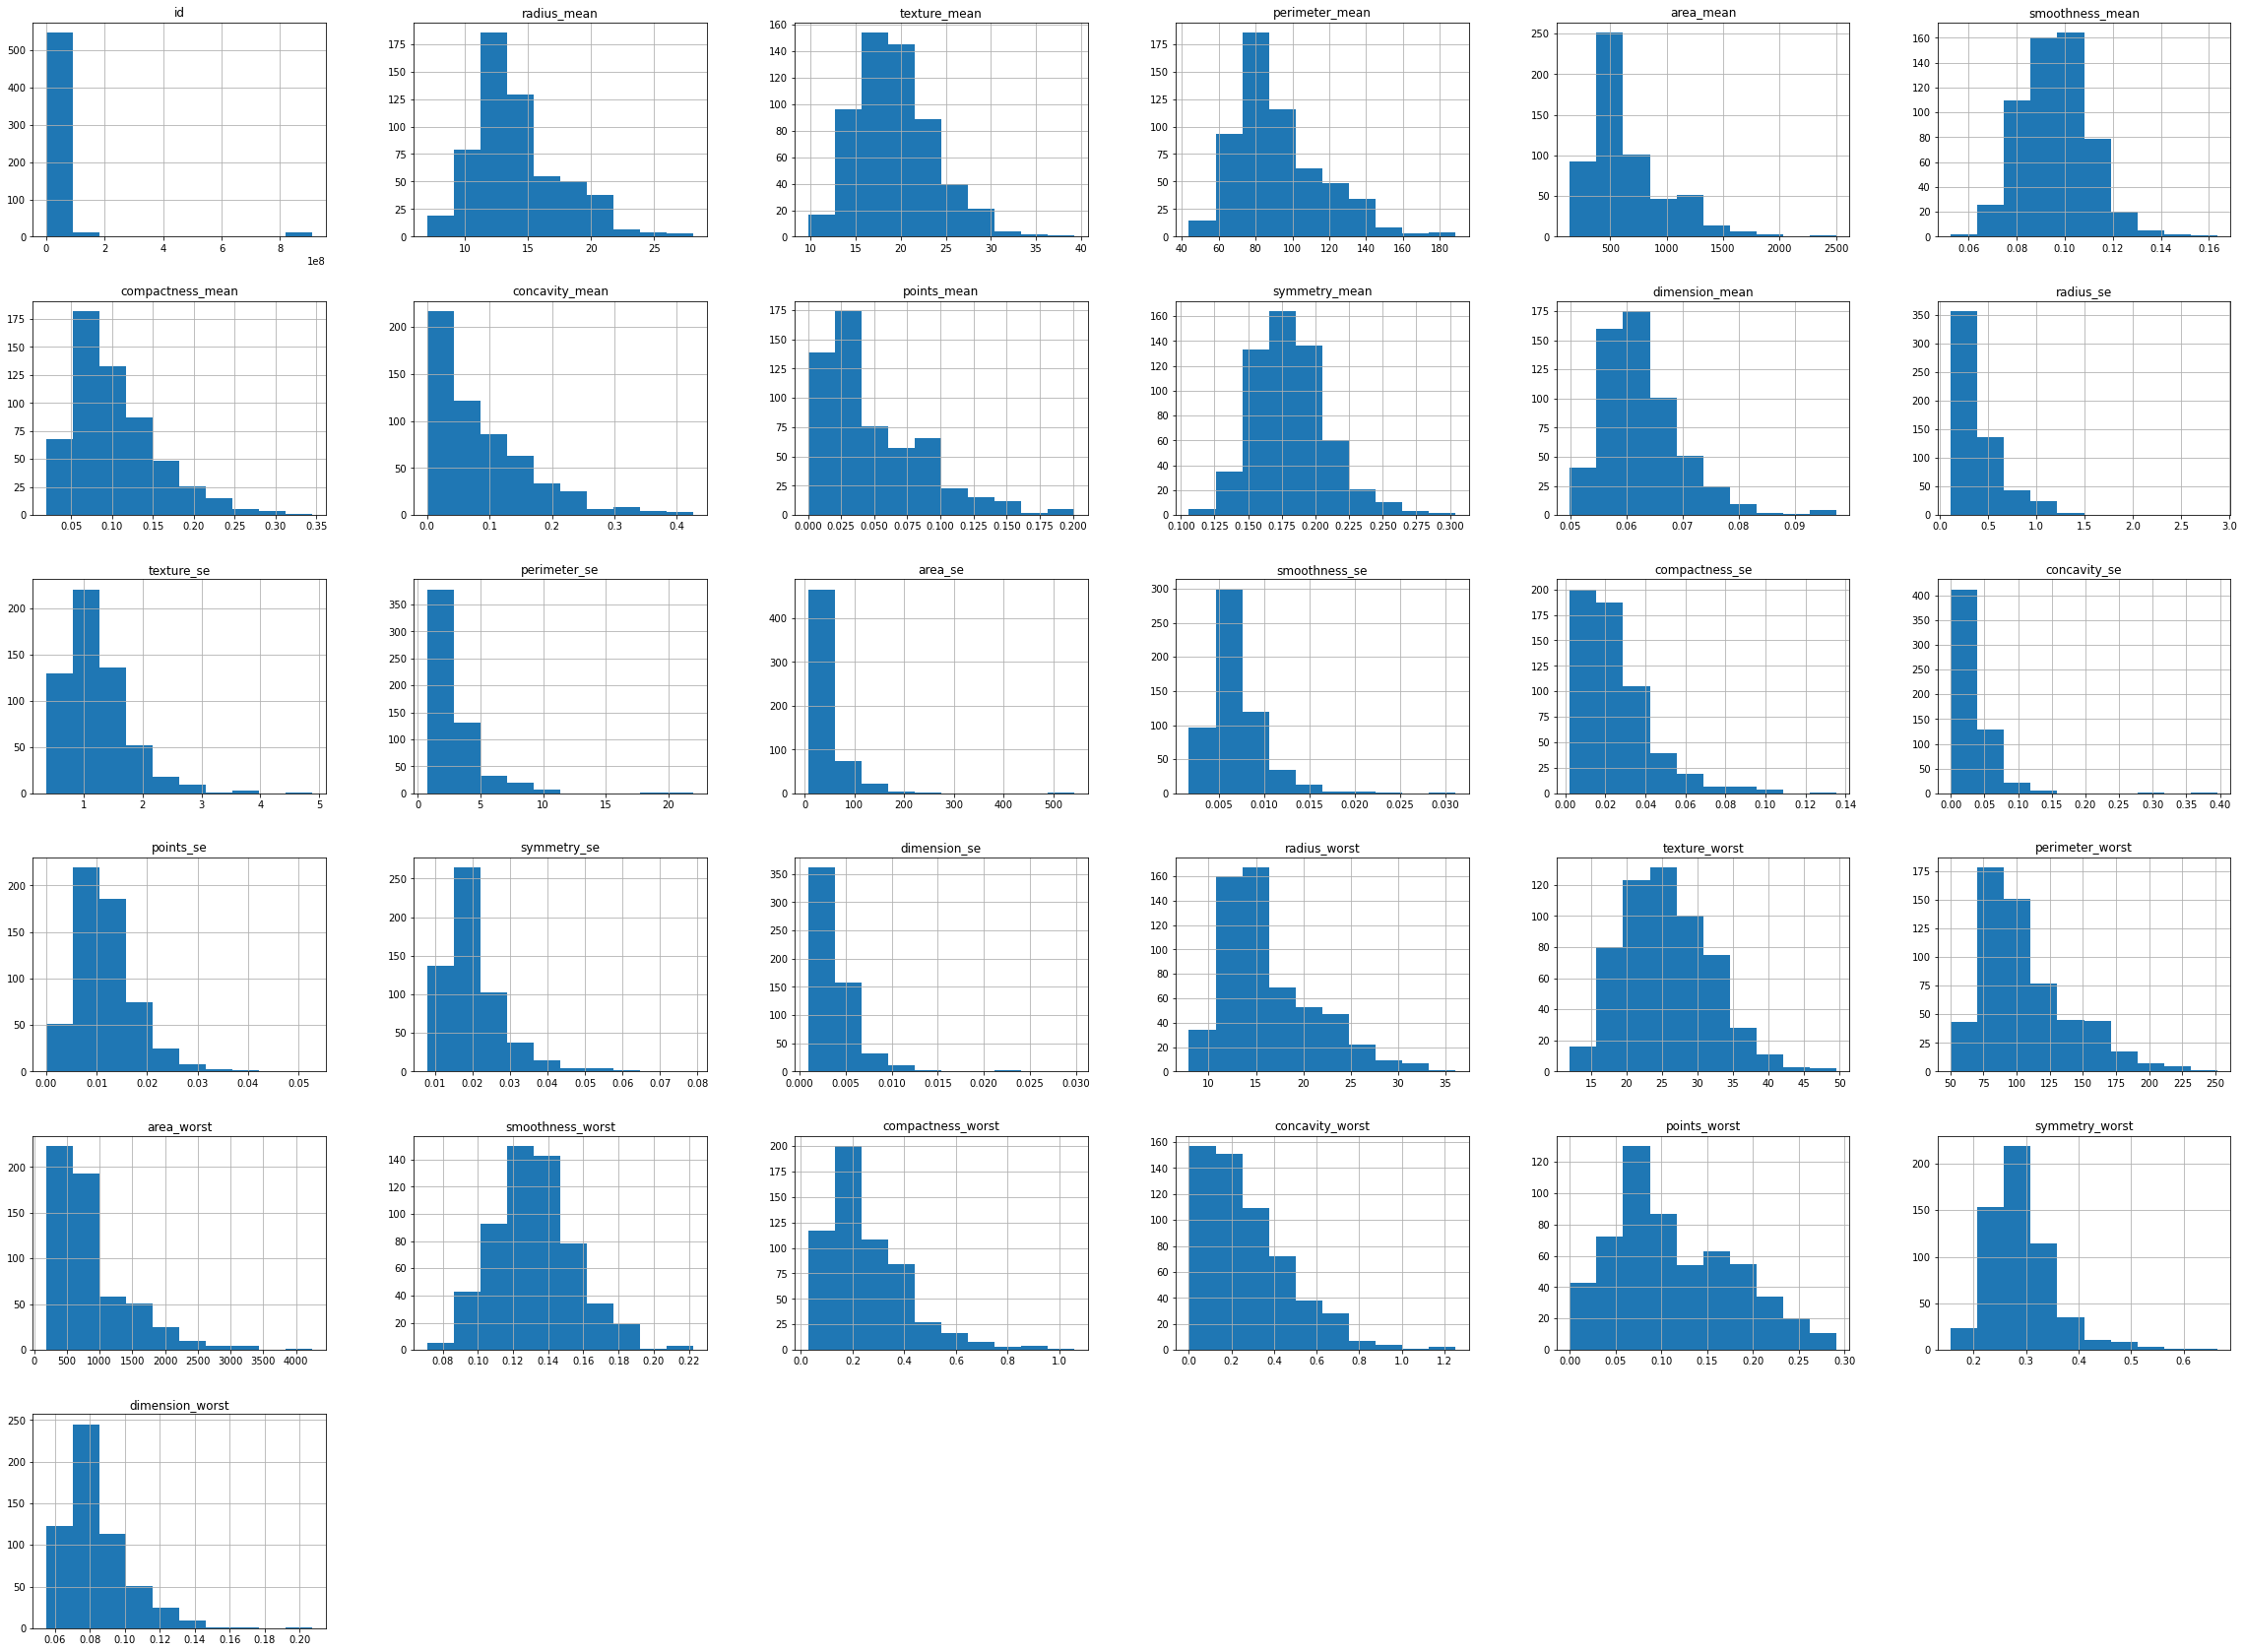

In [10]:
data.hist(figsize=(40,30));

Some insights gained from the key statistics of the data:
- Most of the variables in dataset have **at least a slightly skewed distribution**.
- All of the standard errors variables (name ending with '*_se*') in the dataset are **highly skewed**.
- The only variables that have a normal distribution are: 
    1. `texture_mean`
    2. `smoothness_mean`
    3. `symetry_mean`
    4. `texture_worst`
    5. `smoothness_worst`
    6. `concave_points_worst`

In [11]:
# Understanding the key statistics of the variables
data.describe()[["area_mean", "area_se", "area_worst"]].loc[["min", "mean", "max"]]

,area_mean,area_se,area_worst
min,143.500000,6.802000,185.200000
mean,654.889104,40.337079,880.583128
max,2501.000000,542.200000,4254.000000


In [12]:
# Viewing the number of benign and malignant tumor types.
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

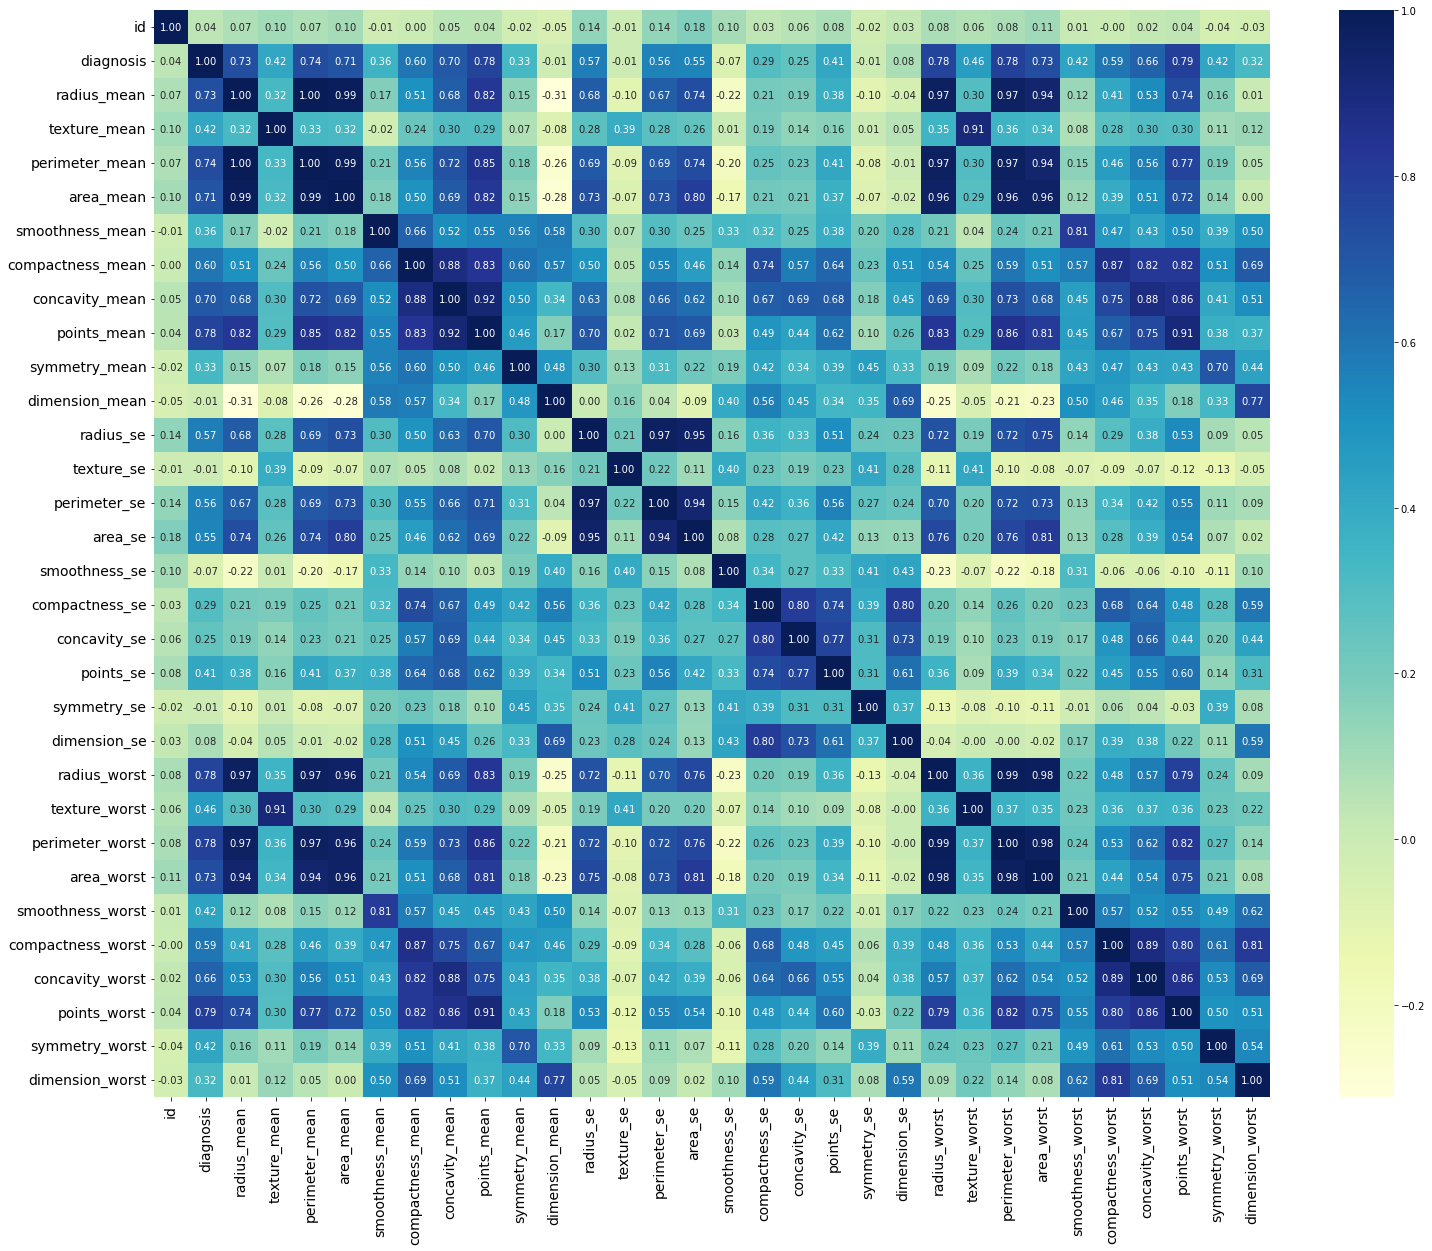

In [13]:
# Plotting the correlation matrix
df = data.copy()

# converting to ones and zeros
df['diagnosis'] = data["diagnosis"].replace({"M": 1, "B": 0})

# create a correlation matrix
correlation_matrix = df.corr()

# plot the matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(25,20))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlGnBu',
            ax=ax);

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

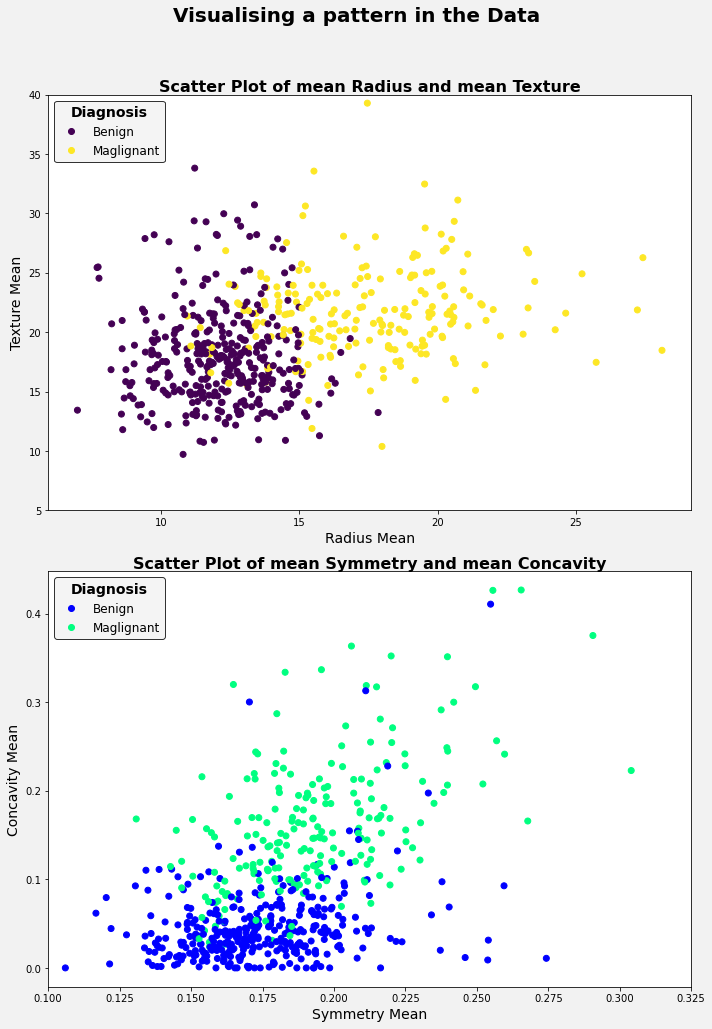

In [14]:
# Instantiating Plot
fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10,15))

# Converting to numerical data
diagnosis = data["diagnosis"].replace({"M": 1, "B": 0})

# Plotting data 
scatter_radius = ax0.scatter(x=data["radius_mean"],
                             y=data["texture_mean"],
                             c=diagnosis,
                             cmap="viridis")
scatter_symmetry = ax1.scatter(x=data["symmetry_mean"],
                               y=data["concavity_mean"],
                               c=diagnosis,
                               cmap="winter") 

# Other formatting settings plot 0
ax0.set_xlabel("Radius Mean",
               fontdict={"size": 14})
ax0.set_ylabel("Texture Mean",
               fontdict={"size": 14})
ax0.set_title("Scatter Plot of mean Radius and mean Texture", 
              fontdict={"fontsize": 16, "fontweight": "bold"},
              pad=2);
handles, labels = scatter_radius.legend_elements()
leg = ax0.legend(handles, ("Benign", "Maglignant"), fontsize=12, loc='upper left', frameon=True);
leg.get_frame().set_color("#F2F2F2")
leg.get_frame().set_edgecolor('black')
leg.set_title("Diagnosis", prop={"size": 14, "weight": 'bold'})
ax0.set_ylim([5, 40]);

# Other formatting settings plot 1
ax1.set_xlabel("Symmetry Mean",
               fontdict={"size": 14})
ax1.set_ylabel("Concavity Mean",
               fontdict={"size": 14})
ax1.set_title("Scatter Plot of mean Symmetry and mean Concavity", 
              fontdict={"fontsize": 16, "fontweight": "bold"},
              pad=2);
handles, labels = scatter_symmetry.legend_elements()
leg = ax1.legend(handles, ("Benign", "Maglignant"), fontsize=12, loc='upper left', frameon=True);
leg.get_frame().set_color('#F2F2F2')
leg.get_frame().set_edgecolor('black')
leg.set_title("Diagnosis", prop={"size": 14, "weight": 'bold'})
ax1.set_xlim([0.1, 0.325])

# Formatting settings for the figure
fig.suptitle("Visualising a pattern in the Data", size=20, weight=1000);
fig.set_facecolor('#F2F2F2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

From the above visualization it can be seen that there seems to be decision boundry that can help classify the type of breast tumor.

# 3. Data Preparation

In [15]:
# Define x and y variables for CMS prediction
x = data.drop('diagnosis', axis=1).to_numpy()
y = data["diagnosis"].replace({"M": 1, "B": 0})

# Splitting data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scaling the data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Created scaled x, to use cross-validated
x_scaled = sc.fit_transform(x)

# 4. Development of Models
In this section, we will train and test the performance of the model based on the **cross validated scores** of the following metrics:
1. `accuracy`
2. `precision_weighted`
3. `recall_weighted`
4. `f1_weighted`
5. `roc_auc`


## 4.1 Cross Validation
- A 5-fold cross validation score, first splits the data into five (`5`) parts.
- It then, considers one (1) part to be the test set and trains the model on the rest of the data. It repeats this for all the five (5) parts.

> **Note**: in this analysis, an average of the cross validated scores is taken into consideration. One could also look at individual values to observe if the performance of a particular algorithm is consistent on all the five (5) parts/folds.

- Using this method will give us a better understanding of which algorithms perform better.

- The Brier Score uses probabilities and the expected values to calculate the mean squared error. The algorithms support probabilities.

## 4.2 Model Training

In [16]:
models = {}

for name,method in [('Logistic Regreesion', LogisticRegression()),
                    ('KNN', KNeighborsClassifier()),
                    ('Random Forest', RandomForestClassifier()),
                    ('Decision Tree', DecisionTreeClassifier())]:
    # Train the model
    method.fit(x_train_scaled, y_train)
    
    # Make predictions
    predictions = method.predict(x_test_scaled)
    
    # Evaluate the performance
    target_names=['benign','malignant']
    print(f'\n-------------  {name}  ---------------') 
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions, target_names=target_names)) 
    
    
    # Save the models
    models.update({name: method})


-------------  Logistic Regreesion  ---------------
[[69  3]
 [ 0 42]]
              precision    recall  f1-score   support

      benign       1.00      0.96      0.98        72
   malignant       0.93      1.00      0.97        42

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114


-------------  KNN  ---------------
[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99        72
   malignant       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


-------------  Random Forest  ---------------
[[70  2]
 [ 1 41]]
              precision    recall  f1-score   support

      benign       0.99      0.97      0.98        72
   malignant       0.95      0.98      0.96